In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/car_price_prediction_.csv')

What is the average mileage for each transmission type?

Transmission
Automatic    151984.129195
Manual       147713.707951
Name: Mileage, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

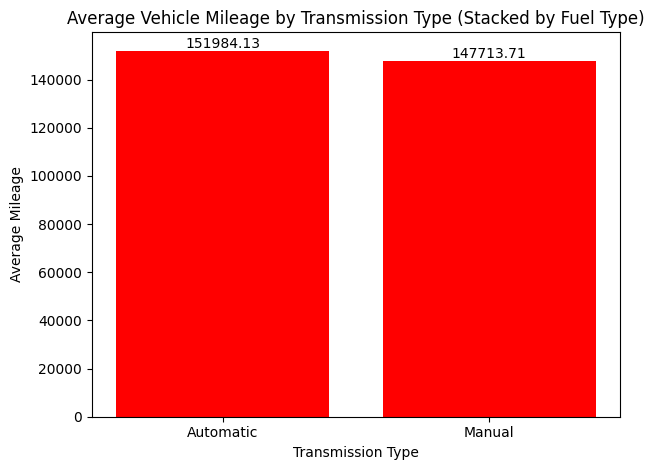

In [18]:
avg_mileage = df.groupby('Transmission')['Mileage'].mean()
print(avg_mileage)

plt.figure()
bars = plt.bar(avg_mileage.index, avg_mileage.values, color="red")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )

plt.xlabel("Transmission Type")
plt.ylabel("Average Mileage")
plt.title("Average Vehicle Mileage by Transmission Type (Stacked by Fuel Type)")

plt.tight_layout()
plt.show 

What is the average price of car by brand?

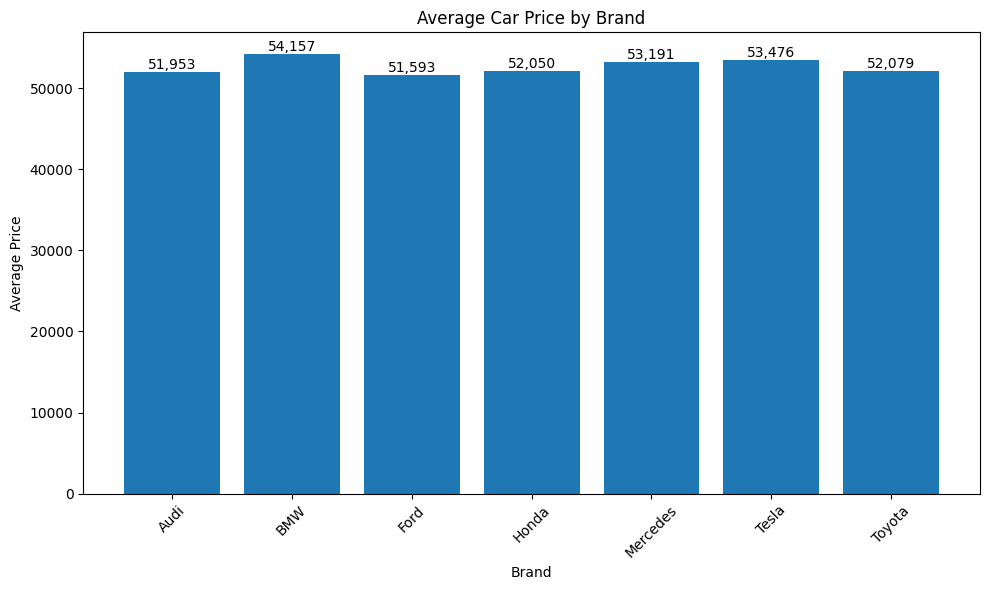

In [4]:
avg_price = df.groupby('Brand')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_price['Brand'], avg_price['Price'])

plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Car Price by Brand')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

Which brands produce the most vehicles in the dataset?

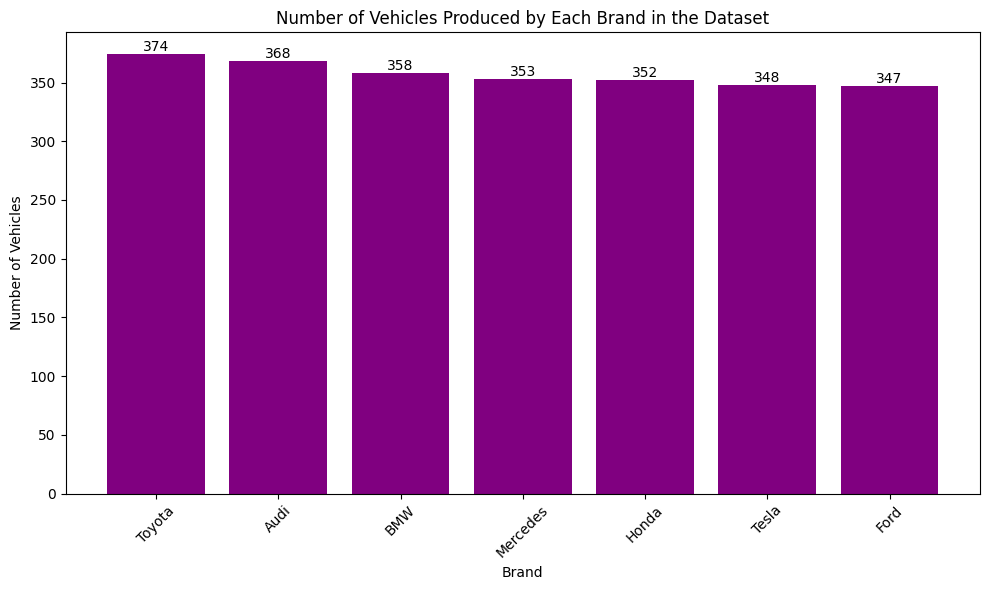

In [9]:


brand_counts = df['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Count']


plt.figure(figsize=(10, 6))
bars = plt.bar(brand_counts['Brand'], brand_counts['Count'], color = 'purple')

plt.xlabel('Brand')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles Produced by Each Brand in the Dataset')
plt.xticks(rotation=45)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height}',
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()


How many electric vehicles does each brand have within the data set, as well as their average engine size?

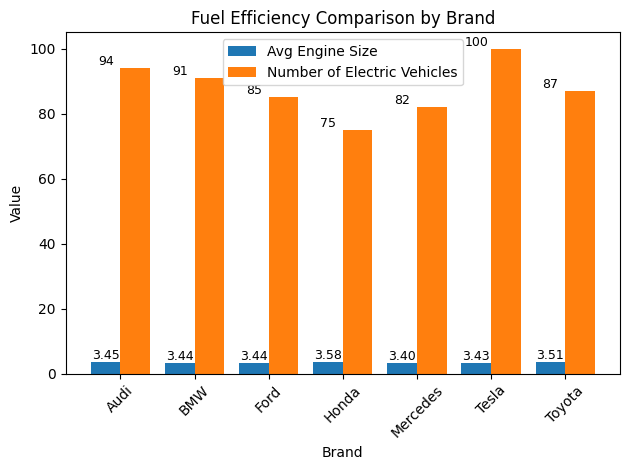

In [19]:
import numpy as np

avg_engine = df.groupby("Brand")["Engine Size"].mean()

electric_count = df[df["Fuel Type"] == "Electric"].groupby("Brand").size()

brands = sorted(set(avg_engine.index).union(set(electric_count.index)))
avg_engine = avg_engine.reindex(brands, fill_value=0)
electric_count = electric_count.reindex(brands, fill_value=0)

x = np.arange(len(brands))
width = 0.4

plt.figure()
plt.bar(x - width/2, avg_engine, width, label="Avg Engine Size")
plt.bar(x + width/2, electric_count, width, label="Number of Electric Vehicles")

for i, value in enumerate(avg_engine):
    plt.text(
        x[i] - width/2,
        value,
        f"{value:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

for i, value in enumerate(electric_count):
    plt.text(
        x[i] - width/2,
        value,
        f"{int(value)}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.xlabel("Brand")
plt.ylabel("Value")
plt.title("Fuel Efficiency Comparison by Brand")
plt.xticks(x, brands, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

What percentage of cars are above certain mileage threshold ? (e.g.100k miles)

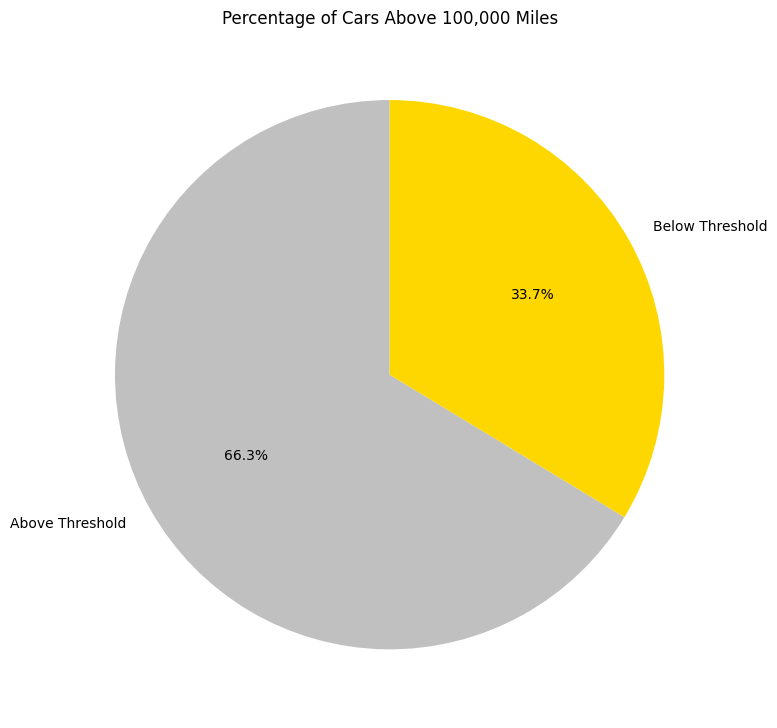

In [16]:

threshold = 100000  


above = (df['Mileage'] > threshold).sum()
below = (df['Mileage'] <= threshold).sum()


percentages = [above, below]
labels = ['Above Threshold', 'Below Threshold']


plt.figure(figsize=(8, 8))
plt.pie(
    percentages,
    labels=labels,
    autopct='%1.1f%%',  
    startangle=90,
    colors=['silver', 'gold']
)

plt.title(f'Percentage of Cars Above {threshold:,} Miles')
plt.tight_layout()
plt.show()
